In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

csv_files = []
for dirname, _, filenames in os.walk('./MachineLearningCSV/MachineLearningCVE'):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))
        csv_files.append(csv_file)

end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv

[DONE] start: 2022/07/27 14:13:40, end: 2022/07/27 14:13:40


In [2]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
df.columns = df.columns.str.strip()
total_data=len(df)
print(f"original length of data: {total_data}")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
available_data=len(df)
print(f"after droping null values, the length of data: {available_data}")
# df_experiment = df.loc[df.Label.str.contains(pat='DoS|BENIGN',na=False)]
# df_experiment = df_experiment.loc[~(df_experiment.Label =="DoS Slowhttptest") ]

# del df
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

original length of data: 2830743
after droping null values, the length of data: 2827876

[DONE] start: 2022/07/27 14:13:50, end: 2022/07/27 14:15:45


In [3]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [3]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

#df.Label.value_counts()
df_experiment = df.copy()
#del df
df_experiment.Label.replace("Web.*", "Web Attack", regex=True, inplace=True)
df_experiment.Label.replace(r'.*Patator$', "Brute Force", regex=True,inplace=True)
df_experiment.Label.replace(["DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris"], "DoS", inplace=True)
print(df_experiment.Label.value_counts())
#CountStatus=df_experiment.Label.value_counts()
#CountStatus.plot.bar()
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')
df_experiment.head(10)



BENIGN          2271320
DoS              251712
PortScan         158804
DDoS             128025
Brute Force       13832
Web Attack         2180
Bot                1956
Infiltration         36
Heartbleed           11
Name: Label, dtype: int64

[DONE] start: 2022/07/26 16:32:27, end: 2022/07/26 16:32:32


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49666,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,49413,4,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
from sklearn.model_selection import train_test_split
from collections import Counter

start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')


y = df_experiment.Label
X = df_experiment.drop(columns='Label')
labels = y.unique()
classes = y.nunique()

print(f'Shape of X: {X.shape}')
print(f'Number of labels: {classes}')
print(f'labels: {labels}')
print(f'[Instances per label]\n{y.value_counts()}')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42, stratify=y_train)
# print(len(df_experiment))
# print(df_experiment.Label.nunique())
# print(df_experiment.Label.value_counts())
print("\n[after spliting the data (training data)]")
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'[Instances per label]\n{y_train.value_counts()}')
print(y_train.value_counts(normalize=True))

print("\n[after spliting the data (val data)]")
print(f'Shape of X_val: {X_val.shape}')
print(f'Shape of y_val: {y_val.shape}')
print(f'[Instances per label]\n{y_val.value_counts()}')
print(y_val.value_counts(normalize=True))

print("\n[after spliting the data (test data)]")
print(f'Shape of X_train: {X_test.shape}')
print(f'Shape of y_train: {y_test.shape}')
print(f'[Instances per label]\n{y_test.value_counts()}')
print(y_test.value_counts(normalize=True))
# print(y_train.nunique())
# print(y_train.value_counts())
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

Shape of X: (2827876, 78)
Number of labels: 9
labels: ['BENIGN' 'DoS' 'Heartbleed' 'Brute Force' 'DDoS' 'Infiltration'
 'PortScan' 'Web Attack' 'Bot']
[Instances per label]
BENIGN          2271320
DoS              251712
PortScan         158804
DDoS             128025
Brute Force       13832
Web Attack         2180
Bot                1956
Infiltration         36
Heartbleed           11
Name: Label, dtype: int64

[after spliting the data (training data)]
Shape of X_train: (1922955, 78)
Shape of y_train: (1922955,)
[Instances per label]
BENIGN          1544497
DoS              171164
PortScan         107986
DDoS              87057
Brute Force        9406
Web Attack         1482
Bot                1330
Infiltration         25
Heartbleed            8
Name: Label, dtype: int64
BENIGN          0.803189
DoS             0.089011
PortScan        0.056156
DDoS            0.045273
Brute Force     0.004891
Web Attack      0.000771
Bot             0.000692
Infiltration    0.000013
Heartbleed      0

[Instances per label (train)]
BENIGN    1544497
attack     378458
Name: Label, dtype: int64
[Instances per label (val)]
BENIGN    272558
attack     66787
Name: Label, dtype: int64
[Instances per label (test)]
BENIGN    454265
attack    111311
Name: Label, dtype: int64

[DONE] start: 2022/07/26 16:32:47, end: 2022/07/26 16:32:48


<AxesSubplot:>

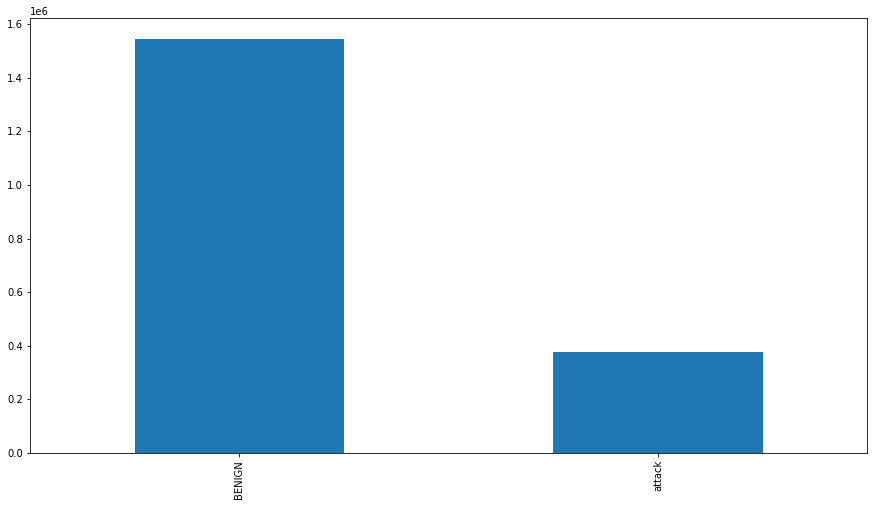

In [5]:
#For binary classifiaction
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')


attack_labels=['DoS','Heartbleed','Brute Force','DDoS','Infiltration','PortScan',
        'Web Attack','Bot']
bi_y_train = y_train.copy()
bi_y_train.replace(attack_labels, value='attack', inplace=True)
print(f'[Instances per label (train)]\n{bi_y_train.value_counts()}')

bi_y_val = y_val.copy()
bi_y_val.replace(attack_labels, value='attack', inplace=True)
print(f'[Instances per label (val)]\n{bi_y_val.value_counts()}')

bi_y_test = y_test.copy()
bi_y_test.replace(attack_labels, value='attack', inplace=True)
print(f'[Instances per label (test)]\n{bi_y_test.value_counts()}')


### switch for binary!
#y_train = bi_train_y
#y_test = bi_test_y
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')
#bi_y_train.head(10)
train_status=pd.value_counts(bi_y_train.values, sort=True)
train_status.plot.bar(figsize=(15,8))

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')


# enc = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
print("instances per label in training set\n", bi_y_train.value_counts())
bi_y_train = le.fit_transform(bi_y_train)
print("instances per label in val set\n", bi_y_val.value_counts())
bi_y_val = le.transform(bi_y_val)
print("instances per label in test set\n", bi_y_test.value_counts())
bi_y_test = le.transform(bi_y_test)

print(X_train.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)


### training data sampling
print('[Sampling Start]')
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
over = SMOTE(sampling_strategy='not majority', n_jobs=-1)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_train, bi_y_train = pipeline.fit_resample(X_train, bi_y_train)
counter = Counter(bi_y_train)
X_sampled_train=pd.DataFrame(X_train)
y_sampled_train=pd.DataFrame(bi_y_train)
print("\n[After sampling training data]")
print(f'training data length {len(X_sampled_train)}')
print(f'Shape of X_sampled_train: {X_sampled_train.shape}')
print(f'Shape of y_sampled_train: {y_sampled_train.shape}')
print(f'[Instances per label]\n{y_sampled_train.value_counts()}')
print(y_sampled_train.value_counts(normalize=True))

del X_sampled_train
del y_sampled_train
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

instances per label in training set
 BENIGN    1544497
attack     378458
Name: Label, dtype: int64
instances per label in val set
 BENIGN    272558
attack     66787
Name: Label, dtype: int64
instances per label in test set
 BENIGN    454265
attack    111311
Name: Label, dtype: int64
(1922955, 78)
(565576, 78)
{'BENIGN': 0, 'attack': 1}
[Sampling Start]

[After sampling training data]
training data length 3088994
Shape of X_sampled_train: (3088994, 78)
Shape of y_sampled_train: (3088994, 1)
[Instances per label]
0    1544497
1    1544497
dtype: int64
0    0.5
1    0.5
dtype: float64

[DONE] start: 2022/07/26 16:32:52, end: 2022/07/26 16:35:48


shape of X_train:	(3088994, 1, 78)
shape of X_val:	(339345, 1, 78)
shape of X_test:	(565576, 1, 78)
shape of bi_y_train:	(3088994,)
shape of bi_y_train2:	(3088994, 2)
shape of bi_y_val:	(339345,)
shape of bi_y_val2:	(339345, 2)
shape of bi_y_test:	(565576,)
shape of bi_y_test2:	(565576, 2)
bi_y_train2: [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
bi_y_test2: [0 0 0 1 0 0 0 0 0 0]
num of classes:2
78


2022-07-26 16:38:17.795134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 16:38:17.800668: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 16:38:17.801034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 16:38:17.801730: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                13080     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 softmax (Dense)             (None, 2)                 62        
                                                                 
Total params: 13,142
Trainable params: 13,142
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150


2022-07-26 16:38:21.851446: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


48266/48266 [==============================] - 138s 3ms/step - loss: 0.2027 - precision: 0.9148 - recall: 0.9148 - accuracy: 0.9148 - f1_score: 0.9148 - val_loss: 0.1462 - val_precision: 0.9293 - val_recall: 0.9293 - val_accuracy: 0.9293 - val_f1_score: 0.8991
Epoch 2/150
48266/48266 [==============================] - 137s 3ms/step - loss: 0.1278 - precision: 0.9479 - recall: 0.9479 - accuracy: 0.9479 - f1_score: 0.9479 - val_loss: 0.1177 - val_precision: 0.9368 - val_recall: 0.9368 - val_accuracy: 0.9368 - val_f1_score: 0.9092
Epoch 3/150
48266/48266 [==============================] - 137s 3ms/step - loss: 0.1094 - precision: 0.9562 - recall: 0.9562 - accuracy: 0.9562 - f1_score: 0.9561 - val_loss: 0.1072 - val_precision: 0.9491 - val_recall: 0.9491 - val_accuracy: 0.9491 - val_f1_score: 0.9257
Epoch 4/150
48266/48266 [==============================] - 137s 3ms/step - loss: 0.0975 - precision: 0.9637 - recall: 0.9637 - accuracy: 0.9637 - f1_score: 0.9637 - val_loss: 0.0947 - val_preci

Epoch 31/150
48266/48266 [==============================] - 138s 3ms/step - loss: 0.0540 - precision: 0.9823 - recall: 0.9823 - accuracy: 0.9823 - f1_score: 0.9823 - val_loss: 0.0586 - val_precision: 0.9796 - val_recall: 0.9796 - val_accuracy: 0.9796 - val_f1_score: 0.9687
Epoch 32/150
48266/48266 [==============================] - 138s 3ms/step - loss: 0.0537 - precision: 0.9824 - recall: 0.9824 - accuracy: 0.9824 - f1_score: 0.9824 - val_loss: 0.0536 - val_precision: 0.9799 - val_recall: 0.9799 - val_accuracy: 0.9799 - val_f1_score: 0.9691
Epoch 33/150
48266/48266 [==============================] - 138s 3ms/step - loss: 0.0532 - precision: 0.9826 - recall: 0.9826 - accuracy: 0.9826 - f1_score: 0.9826 - val_loss: 0.0590 - val_precision: 0.9795 - val_recall: 0.9795 - val_accuracy: 0.9795 - val_f1_score: 0.9686
Epoch 34/150
48266/48266 [==============================] - 138s 3ms/step - loss: 0.0528 - precision: 0.9827 - recall: 0.9827 - accuracy: 0.9827 - f1_score: 0.9827 - val_loss: 0.

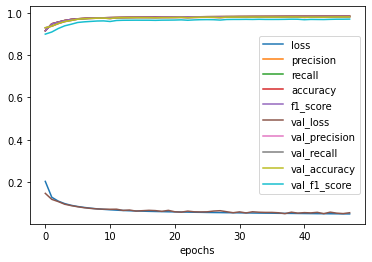


[DONE] start: 2022/07/26 16:38:16, end: 2022/07/26 18:28:35


In [7]:
### reshape input data to LSTM format [samples, time_steps, features]
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')


import tensorflow_addons as tfa
import tensorflow as tf
from model_evaluator import Evaluator
from sklearn.metrics import recall_score, precision_score, f1_score
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

n_classes = len(le.classes_)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_lstm = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
bi_y_train2=tf.keras.utils.to_categorical(bi_y_train, num_classes=n_classes)
bi_y_val2=tf.keras.utils.to_categorical(bi_y_val, num_classes=n_classes)
bi_y_test2=tf.keras.utils.to_categorical(bi_y_test, num_classes=n_classes)

print(f"shape of X_train:\t{X_train_lstm.shape}")
print(f"shape of X_val:\t{X_val_lstm.shape}")
print(f"shape of X_test:\t{X_test_lstm.shape}")
print(f"shape of bi_y_train:\t{bi_y_train.shape}")
print(f"shape of bi_y_train2:\t{bi_y_train2.shape}")
print(f"shape of bi_y_val:\t{bi_y_val.shape}")
print(f"shape of bi_y_val2:\t{bi_y_val2.shape}")
print(f"shape of bi_y_test:\t{bi_y_test.shape}")
print(f"shape of bi_y_test2:\t{bi_y_test2.shape}")

print(f'bi_y_train2: {bi_y_train2[:10]}')
print(f'bi_y_test2: {bi_y_test[:10]}')

print(f"num of classes:{n_classes}")
n_features = X_train_lstm.shape[2]
print(n_features)

def multiClassModel(n_features, n_classes=9):
    adam=Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    #model.add(InputLayer(shape=(None, n_features)))
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=[tf.keras.metrics.Precision(name='precision'),
                                                                              tf.keras.metrics.Recall(name='recall'),
                                                                              'accuracy',
                                                                              tfa.metrics.F1Score(num_classes=n_classes,
                                                                                                  average='macro')])
    #model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=[Evaluator.precision, 
    #                                                                          Evaluator.recall,
    #                                                                          'accuracy',
    #                                                                          Evaluator.fmeasure])

    model.summary()
    return model

callback = EarlyStopping(patience=10, mode='min', restore_best_weights=True)
backend.clear_session()
model = multiClassModel(n_features, n_classes)
history = model.fit(X_train_lstm, bi_y_train2, 
                    epochs=150, batch_size=64, validation_data=(X_val_lstm, bi_y_val2), callbacks=[callback])
                    #epochs=5, batch_size=64, validation_data=(X_val_lstm, bi_y_val2), callbacks=[callback])

### check the history of epochs
#pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(8, 6))
pd.DataFrame(history.history).plot(kind='line', xlabel='epochs')

import matplotlib.pyplot as plt
plt.show()
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')


In [8]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

y_train_pred_prob = model.predict(X_train_lstm)
y_test_pred_prob = model.predict(X_test_lstm)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
print('\n[DONE]')


[DONE]



[DONE] start: 2022/07/26 19:26:16, end: 2022/07/26 19:26:17


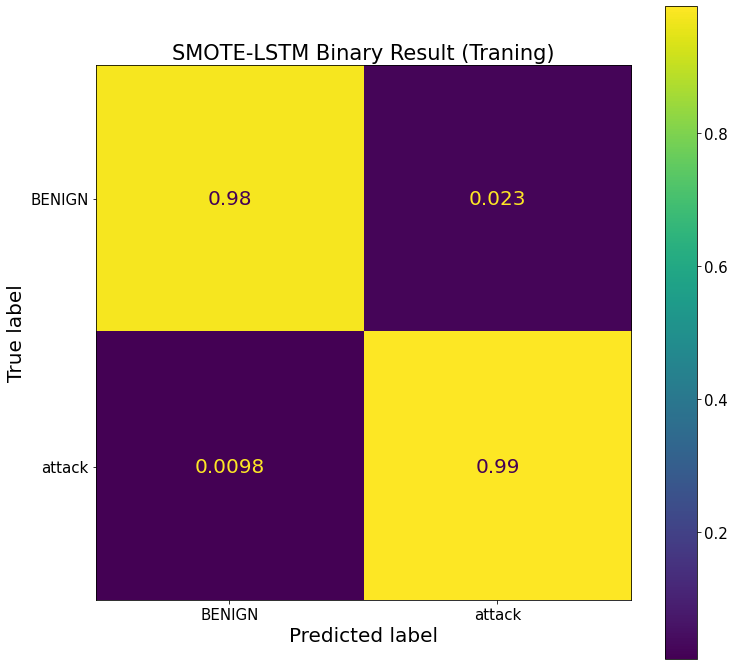

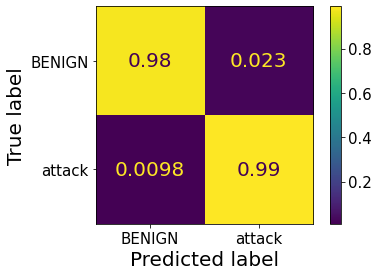

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from numpy import argmax
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')


%matplotlib inline
bi_y_train3=argmax(bi_y_train2, axis=1)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=80) # figure title 폰트 크기

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('SMOTE-LSTM Binary Result (Traning)',fontdict={'size':'21'})

ConfusionMatrixDisplay.from_predictions(bi_y_train3, y_train_pred, display_labels=le.classes_, normalize='true').plot(ax=ax)
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')



[DONE] start: 2022/07/26 19:26:21, end: 2022/07/26 19:26:21


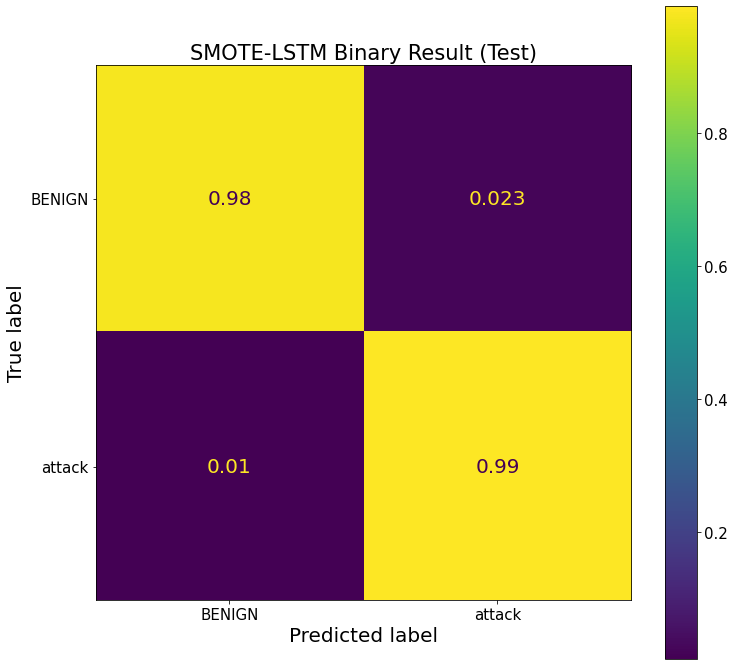

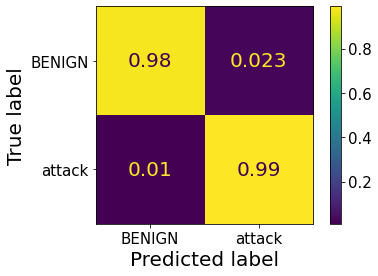

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from numpy import argmax
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

%matplotlib inline
bi_y_test3=argmax(bi_y_test2, axis=1)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=80) # figure title 폰트 크기

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('SMOTE-LSTM Binary Result (Test)',fontdict={'size':'21'})

ConfusionMatrixDisplay.from_predictions(bi_y_test3, y_test_pred, display_labels=le.classes_, normalize='true').plot(ax=ax)

end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

In [11]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance



y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(bi_y_train)
print(classification_report(y_train_labels, y_train_pred_labels, digits=4, labels=le.classes_))
#performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
#performance
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')


              precision    recall  f1-score   support

      BENIGN     0.9901    0.9770    0.9835   1544497
      attack     0.9773    0.9902    0.9837   1544497

    accuracy                         0.9836   3088994
   macro avg     0.9837    0.9836    0.9836   3088994
weighted avg     0.9837    0.9836    0.9836   3088994


[DONE] start: 2022/07/26 19:26:26, end: 2022/07/26 19:28:36


In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance



y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_labels = le.inverse_transform(bi_y_test)
print(classification_report(y_test_labels, y_test_pred_labels, digits=4, labels=le.classes_))
#performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
#performance
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

In [ ]:
from model_evaluator2 import Evaluator
print('\n[DONE]')